In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = cancer['data']
y = cancer['target']

In [5]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y)

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [7]:
from sklearn.linear_model import LogisticRegression
# 模型评估（召回率），选择0.5为阈值
from sklearn.metrics import classification_report # 用于分类报告
LR = LogisticRegression()
LR.fit(xtrain,ytrain)
print(classification_report(ytest, LR.predict(xtest)))

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        56
           1       0.93      0.91      0.92        87

    accuracy                           0.90       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
print(classification_report(ytest, knn.predict(xtest)))

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        56
           1       0.92      0.92      0.92        87

    accuracy                           0.90       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



In [9]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(xtrain,ytrain)
print(classification_report(ytest, svc.predict(xtest)))

C:\ProgramData\Anaconda3\envs\pythonProject1\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        56
           1       0.93      0.91      0.92        87

    accuracy                           0.90       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



In [10]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain,ytrain)
print(classification_report(ytest, svc.predict(xtest)))

SVC()

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        56
           1       0.89      0.98      0.93        87

    accuracy                           0.91       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



In [11]:
from sklearn.naive_bayes import GaussianNB
bay = GaussianNB()
bay.fit(xtrain,ytrain)
print(classification_report(ytest, bay.predict(xtest)))

GaussianNB()

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        56
           1       0.93      0.95      0.94        87

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



In [12]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(xtrain,ytrain)
print(classification_report(ytest, DT.predict(xtest)))

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        56
           1       0.95      0.91      0.93        87

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143



In [13]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(oob_score=True)
RF.fit(xtrain,ytrain)
print(classification_report(ytest, RF.predict(xtest)))

RandomForestClassifier(oob_score=True)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        56
           1       0.94      0.95      0.95        87

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [14]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier(num_leaves=1000,n_estimators=200)
LGBM.fit(xtrain,ytrain)
print(classification_report(ytest, LGBM.predict(xtest)))

LGBMClassifier(n_estimators=200, num_leaves=1000)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        56
           1       0.96      0.98      0.97        87

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

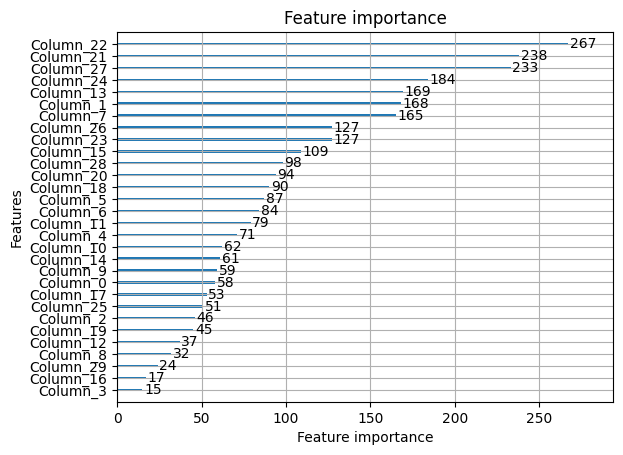

In [15]:
from lightgbm import plot_importance
#model_lgb.feature_importances_
plot_importance(LGBM)

In [16]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
print(classification_report(ytest, xgb.predict(xtest)))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        56
           1       0.95      0.95      0.95        87

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [17]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
print(classification_report(ytest, ada.predict(xtest)))

AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        56
           1       0.93      0.98      0.96        87

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



In [18]:
from sklearn.neural_network import MLPClassifier   #导入多层感知器
mlp= MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu',)
mlp.fit(xtrain,ytrain)
print(classification_report(ytest, mlp.predict(xtest)))

MLPClassifier(hidden_layer_sizes=(50, 25))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        56
           1       0.93      0.94      0.94        87

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



In [33]:
train_data = pd.DataFrame(xtrain).join(pd.DataFrame(ytrain).rename(columns={0:'lab'}))

In [34]:
from autogluon.tabular import TabularDataset,TabularPredictor
train_data=TabularDataset(train_data)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,lab
0,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,23.58,100.30,725.9,0.1157,0.1350,0.08115,0.05104,0.2364,0.07182,1
1,19.73,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.09740,0.1733,0.06697,...,25.59,159.80,1933.0,0.1710,0.5955,0.84890,0.25070,0.2749,0.12970,0
2,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,21.19,80.88,491.8,0.1389,0.1582,0.18040,0.09608,0.2664,0.07809,1
3,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031,1
4,13.86,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,0.2106,0.06916,...,26.93,104.40,750.1,0.1460,0.4370,0.46360,0.16540,0.3630,0.10590,0


In [35]:
TP=TabularPredictor(label='lab').fit(train_data)
print(classification_report(xtest, TP.predict(xtrain)))

No path specified. Models will be saved in: "AutogluonModels\ag-20230504_101210\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230504_101210\"
AutoGluon Version:  0.7.0
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    426
Train Data Columns: 30
Label Column: lab
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2359.22 MB
	Train Data (Original)  Memory Usage: 0.1 MB (0.0% o

TypeError: data must be TabularDataset or pandas.DataFrame or str file path to data

In [39]:
print(classification_report(train_data['lab'], TP.predict(train_data)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       156
           1       1.00      1.00      1.00       270

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



In [38]:
print(classification_report(ytest, TP.predict(pd.DataFrame(xtest))))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        56
           1       0.93      0.95      0.94        87

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143

